<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/gradient_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Descent
 ... on a 2-dimensional function

In [ ]:
import numpy as np
from numpy import linalg as LA

import matplotlib as mpl
import matplotlib.pyplot as plt 

Define a simple 2-dimensional quadratic function `func` as $
f(x,y) = (0.75x -1.5)^2 + (y-2)^2 + 0.25xy$

In [ ]:
def func(x,y):
  return (0.75*x-1.5)**2 + (y-2.0)**2 + 0.25*x*y

Encode the gradient for `func` as the partial derivatives over x and over y.
$\nabla f(x,y) = (1.125x - 2.25 + 0.25 y, 2y - 4 + 0.25 x)$

In [ ]:
def func_grad(vx,vy):
  dfdx = 1.125*vx - 2.25 + 0.25*vy
  dfdy = 2.0*vy - 4.0 + 0.25*vx
  return np.array([dfdx,dfdy])

Prepare for showing a 2-dimensional countour plot

In [ ]:
xlist = np.linspace(0, 5, 26)
ylist = np.linspace(0, 5, 26)
x, y = np.meshgrid(xlist, ylist)
z = func(x,y)
lev = np.linspace(0,20,21)

Initialize the gradient descent at $(5,4)$.  
Set parameters (10 iterations, $\gamma = 0.2$ learning rate)

In [ ]:
v_init = np.array([5,4])
num_iter = 10
values = np.zeros([num_iter,2])

values[0,:] = v_init
v = v_init

gamma = 0.5

The actual gradient descent algorithm (that's it!)

In [ ]:
for i in range(1,num_iter):
  v = v - gamma * func_grad(v[0],v[1])
  values[i,:] = v

Plot the countours of the function `func` and the path of gradient descent stored in `values'.

Go ahead and change some parameters of the algorithm and plotting and see what happens, especially the learning rate $\gamma$.  

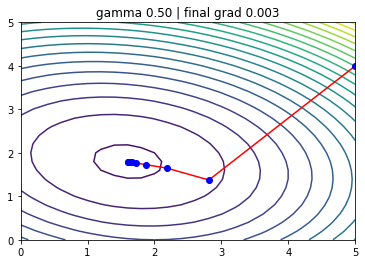

In [ ]:
plt.contour(x,y,z,levels=lev)
plt.plot(values[:,0],values[:,1],'r-')
plt.plot(values[:,0],values[:,1],'bo')
grad_norm = LA.norm(func_grad(v[0],v[1]))
title = "gamma %0.2f | final grad %0.3f" % (gamma,grad_norm)
plt.title(title)
plt.show()